# HW2

In [1]:
import numpy as np
import pyam
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
import io
import itertools
import yaml
import math
%matplotlib inline

<IPython.core.display.Javascript object>

### Uploading the input data

You can find this input data in the related Github repository with the same name.

In [58]:
df = pyam.IamDataFrame(data='ar6_final_energy.csv')

pyam.core - INFO: Reading file ar6_final_energy.csv


In this dataset, I have Final Energy Demand, Emissions and Population data for EU28 and Turkey until 2050.

In [59]:
display_df = df.filter(variable = 'Final Energy*', level = "3-")
display_df.timeseries()

2005  \
model       scenario           region                               variable                                           unit          
AIM/CGE 2.2 EN_INDCi2030_1000f European Union (28 member countries) Final Energy|Residential and Commercial            EJ/yr   NaN   
                                                                    Final Energy|Residential and Commercial|Commercial EJ/yr   NaN   
                                                                    Final Energy|Residential and Commercial|Residen... EJ/yr   NaN   
            EN_INDCi2030_1200  European Union (28 member countries) Final Energy|Residential and Commercial            EJ/yr   NaN   
                                                                    Final Energy|Residential and Commercial|Commercial EJ/yr   NaN   
...                                                                                                                            ...   
WITCH 5.0   EN_NPi2020_450     European Union (28 member countries) Final Energy|Residential and Commercial|Commercial EJ/yr   NaN   
                                                                    Final Energy|Residential and Commercial|Residen... EJ/yr   NaN   
            EN_NPi2020_450f    European Union (28 member countries) Final Energy|Residential and Commercial            EJ/yr   NaN   
                                                                    Final Energy|Residential and Commercial|Commercial EJ/yr   NaN   
                                                                    Final Energy|Residential and Commercial|Residen... EJ/yr   NaN   

                                                                                                                                   2010  \
model       scenario           region                               variable                                           unit               
AIM/CGE 2.2 EN_INDCi2030_1000f European Union (28 member countries) Final Energy|Residential and Commercial            EJ/yr  20.637000   
                                                                    Final Energy|Residential and Commercial|Commercial EJ/yr   7.010700   
                                                                    Final Energy|Residential and Commercial|Residen... EJ/yr  13.626300   
            EN_INDCi2030_1200  European Union (28 member countries) Final Energy|Residential and Commercial            EJ/yr  20.637000   
                                                                    Final Energy|Residential and Commercial|Commercial EJ/yr   7.010700   
...                                                                                                                                 ...   
WITCH 5.0   EN_NPi2020_450     European Union (28 member countries) Final Energy|Residential and Commercial|Commercial EJ/yr   6.026312   
                                                                    Final Energy|Residential and Commercial|Residen... EJ/yr  12.189403   
            EN_NPi2020_450f    European Union (28 member countries) Final Energy|Residential and Commercial            EJ/yr  18.215715   
                                                                    Final Energy|Residential and Commercial|Commercial EJ/yr   6.026312   
                                                                    Final Energy|Residential and Commercial|Residen... EJ/yr  12.189403   

                                                                                                                                   2015  \
model       scenario           region                               variable                                           unit               
AIM/CGE 2.2 EN_INDCi2030_1000f European Union (28 member countries) Final Energy|Residential and Commercial            EJ/yr  18.539200   
                                                                    Final Energy|Residential and Commercial|Commercial EJ/yr   6.652500   
                   

## Final Energy Demand vs Emission

### EU28

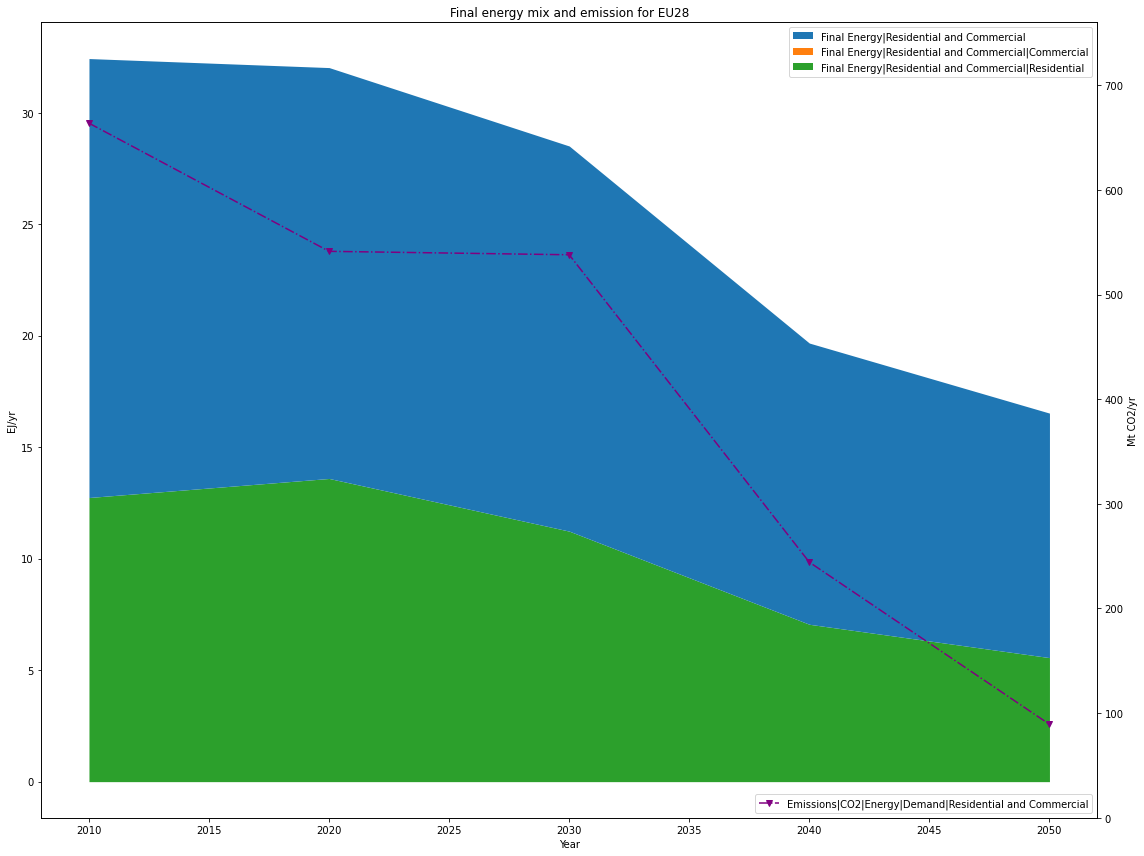

In [60]:
fig, ax = plt.subplots()

args = dict(
    model="IMAGE 3.2",
    scenario="SSP2_SPA1_19I_D_LB",
    region='European Union (28 member countries)',
    year=[2010, 2020, 2030, 2040, 2050]
)

data_energy = df.filter(**args, variable=["Final Energy|Residential and Commercial","Final Energy|Residential and Commercial|Residential", "Final Energy|Residential and Commercial|Commercial"])
data_energy.plot.stack(ax=ax, title=None, legend=False)

emission = "Emissions|CO2|Energy|Demand|Residential and Commercial"
data_emission = df.filter(**args, variable=emission)

ax2 = ax.twinx()
format_args = dict(color="purple", linestyle="dashdot", marker="v", label="Emissions|CO2|Energy|Demand|Residential and Commercial")
data_emission.plot(ax=ax2, legend=False, title=None, **format_args, figsize=[16,12])

ax.legend(loc=1)
ax2.legend(loc=4)
ax2.set_ylim(0, 760)
ax.set_title("Final energy mix and emission for EU28")

plt.tight_layout()
plt.show()

I decided to use model IMAGE 3.2 since it's the only model that contains data for Turkey. I chose the scenario SSP2_SPA1_19I_D_LB.

In the graph above, I aimed to analyse the relation between Final Energy Demand in Residential and Commercial Sector and Emissions. However, when I plotted the value I realiezed that there is a problem in the Final Energy|Residential and Commercial|Commercial	data. Then I checked the exact values below.

In [61]:
data_energy.timeseries()

2010  \
model     scenario           region                               variable                                           unit               
IMAGE 3.2 SSP2_SPA1_19I_D_LB European Union (28 member countries) Final Energy|Residential and Commercial            EJ/yr  19.686093   
                                                                  Final Energy|Residential and Commercial|Commercial EJ/yr   0.000007   
                                                                  Final Energy|Residential and Commercial|Residen... EJ/yr  12.742970   

                                                                                                                                 2020  \
model     scenario           region                               variable                                           unit               
IMAGE 3.2 SSP2_SPA1_19I_D_LB European Union (28 member countries) Final Energy|Residential and Commercial            EJ/yr  18.427079   
                                                                  Final Energy|Residential and Commercial|Commercial EJ/yr   0.000005   
                                                                  Final Energy|Residential and Commercial|Residen... EJ/yr  13.597061   

                                                                                                                                 2030  \
model     scenario           region                               variable                                           unit               
IMAGE 3.2 SSP2_SPA1_19I_D_LB European Union (28 member countries) Final Energy|Residential and Commercial            EJ/yr  17.272914   
                                                                  Final Energy|Residential and Commercial|Commercial EJ/yr   0.000006   
                                                                  Final Energy|Residential and Commercial|Residen... EJ/yr  11.234767   

                                                                                                                                 2040  \
model     scenario           region                               variable                                           unit               
IMAGE 3.2 SSP2_SPA1_19I_D_LB European Union (28 member countries) Final Energy|Residential and Commercial            EJ/yr  12.612051   
                                                                  Final Energy|Residential and Commercial|Commercial EJ/yr   0.000006   
                                                                  Final Energy|Residential and Commercial|Residen... EJ/yr   7.057322   

                                                                                                                                 2050  
model     scenario           region                               variable                                           unit              
IMAGE 3.2 SSP2_SPA1_19I_D_LB European Union (28 member countries) Final Energy|Residential and Commercial            EJ/yr  10.965775  
                                                                  Final Energy|Residential and Commercial|Commercial EJ/yr   0.000005  
                                                                  Final Energy|Residential and Commercial|Residen... EJ/yr   5.562531

In [62]:
data_energy.timeseries().query("variable=='Final Energy|Residential and Commercial'").values-data_energy.timeseries().query("variable=='Final Energy|Residential and Commercial|Residential'").values

array([[6.94312323, 4.8300177 , 6.03814665, 5.55472875, 5.40324404]])

In [63]:
data_energy.timeseries().query("variable=='Final Energy|Residential and Commercial|Commercial'").values

array([[6.94312321e-06, 4.83001882e-06, 6.03814571e-06, 5.55472881e-06,
        5.40324370e-06]])

I abstracted the final energy demand of residential in residential and commercial sector from total final energy demand in residential and commercial sector to get the data for final energy demand of commercial in residential and commercial sector. As can easily be noticed from the values above, there should be an error about unit conversion for this value.

But, since I only have the emission data for residential and commercial sector, I'll continue with the total final energy demand in residential and commercial sector.

It can be seen that final energy demand in residential and commercial sector will decrease in EU28 until 2050 and beyond. Emissions also will decrease proportionally to the final energy demand in this sector. It's kind of interesting to see the there are huge differences in terms of emission reductions between the decades. For example between 2020-2030 emission reduction is around 3.30 MtCO2/yr. However, when we look at the 2030-2040 this reduction is around 293. 7 MtCO2/yr which noticably higher than the previous decade. 

Then I did the same analyse for Turkey.


In [64]:
data_emission.timeseries()

,,,,,2010,2020,2030,2040,2050
model,scenario,region,variable,unit,,,,,
IMAGE 3.2,SSP2_SPA1_19I_D_LB,European Union (28 member countries),Emissions|CO2|Energy|Demand|Residential and Commercial,Mt CO2/yr,663.707989,541.260252,537.973049,244.239031,89.314537


### Turkey

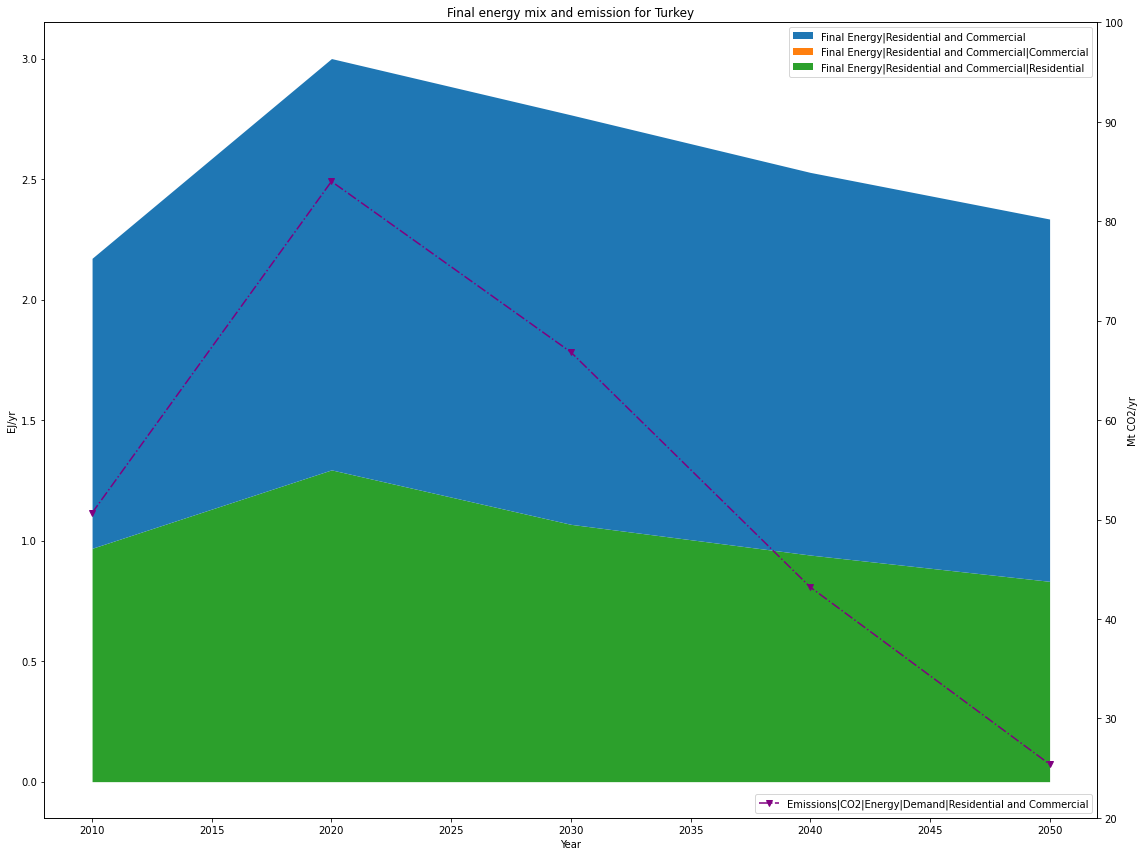

In [65]:
fig, ax = plt.subplots()

args = dict(
    model="IMAGE 3.2",
    scenario="SSP1_SPA1_19I_D_LB",
    region='Turkey',
    year=[2010, 2020, 2030, 2040, 2050]
)

data_energy = df.filter(**args, variable=["Final Energy|Residential and Commercial","Final Energy|Residential and Commercial|Residential", "Final Energy|Residential and Commercial|Commercial"])
data_energy.plot.stack(ax=ax, title=None, legend=False)

emission = "Emissions|CO2|Energy|Demand|Residential and Commercial"
data_emission = df.filter(**args, variable=emission)

ax2 = ax.twinx()
format_args = dict(color="purple", linestyle="dashdot", marker="v", label="Emissions|CO2|Energy|Demand|Residential and Commercial")
data_emission.plot(ax=ax2, legend=False, title=None, **format_args, figsize=[16,12])

ax.legend(loc=1)
ax2.legend(loc=4)
ax2.set_ylim(20, 100)
ax.set_title("Final energy mix and emission for Turkey")

plt.tight_layout()
plt.show()

Again, as we can see from the graph and table below, there is also unit conversion error in commercial sector.

In [66]:
data_energy.timeseries().query("variable=='Final Energy|Residential and Commercial'").values-data_energy.timeseries().query("variable=='Final Energy|Residential and Commercial|Residential'").values

array([[0.23506455, 0.41296865, 0.63122396, 0.6474048 , 0.67198026]])

In [68]:
data_energy.timeseries().query("variable=='Final Energy|Residential and Commercial|Commercial'").values

array([[2.35064616e-07, 4.12969014e-07, 6.31223572e-07, 6.47404589e-07,
        6.71980324e-07]])

In Turkey, even though the final energy demand in residential and commercial sector will be increased in 2050, compared to 2010, emission values are decreased until 2050. This looks strange to me.

I tried to explain the demand increase with the expected population incrase over the years below.

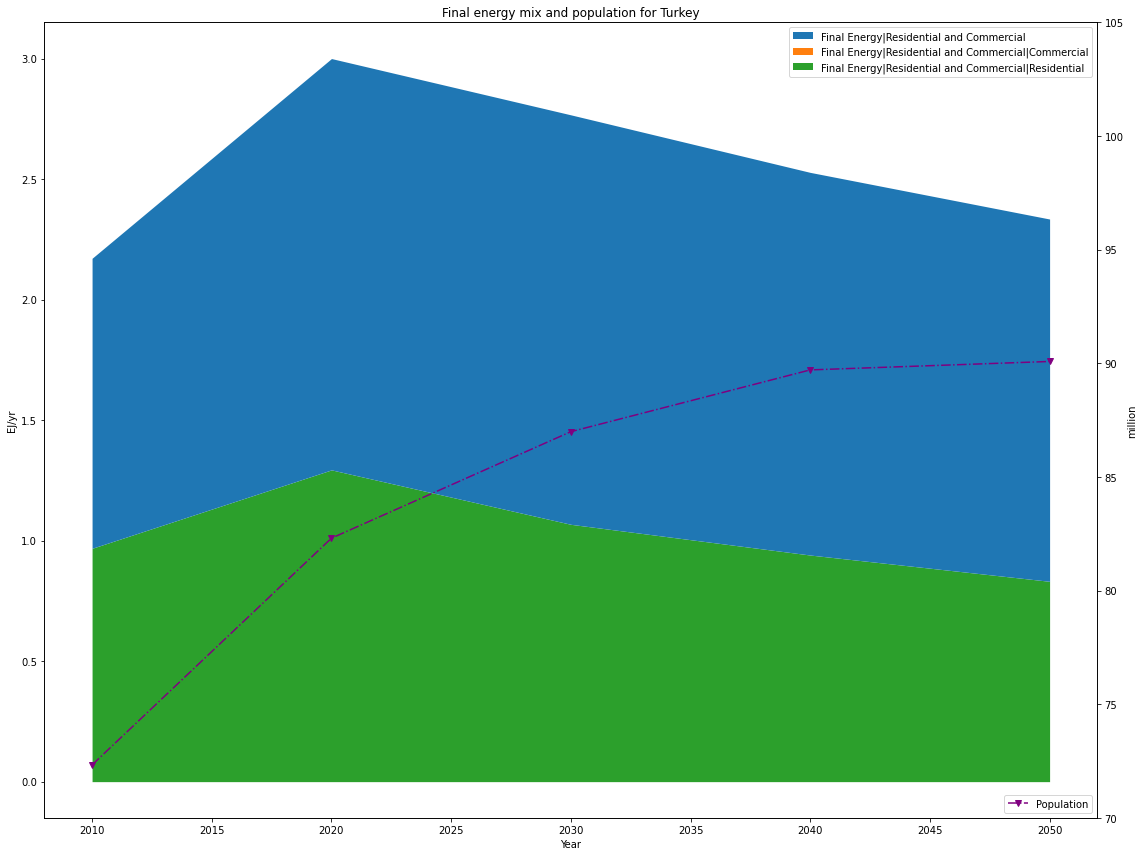

In [69]:
fig, ax = plt.subplots()

args = dict(
    model="IMAGE 3.2",
    scenario="SSP1_SPA1_19I_D_LB",
    region='Turkey',
    year=[2010, 2020, 2030, 2040, 2050]
)

data_energy = df.filter(**args, variable=["Final Energy|Residential and Commercial","Final Energy|Residential and Commercial|Residential", "Final Energy|Residential and Commercial|Commercial"])
data_energy.plot.stack(ax=ax, title=None, legend=False)

population = "Population"
data_population = df.filter(**args, variable=population)

ax2 = ax.twinx()
format_args = dict(color="purple", linestyle="dashdot", marker="v", label="Population")
data_population.plot(ax=ax2, legend=False, title=None, **format_args, figsize=[16,12])

ax.legend(loc=1)
ax2.legend(loc=4)
ax2.set_ylim(70,105)
ax.set_title("Final energy mix and population for Turkey")

plt.tight_layout()
plt.show()

As can be seen in the graph above, there is a popuation increase in Turkey until 2050. This can be directly affect the final energy demand. However, still, the decrease in the emissions in residential and commercial sector looks interesting to me.

## Electricity Generation Mix

### Uploading the input data

In [91]:
df_elec = pyam.IamDataFrame(data='ar6_elec.csv')

pyam.core - INFO: Reading file ar6_elec.csv


In [92]:
years = [2010, 2020, 2030, 2040, 2050]

In this dataset, I have Electricity generation mix and  Emissions in electricity generation data for EU28 and Turkey until 2050.

Again, I chose the IMAGE 3.2 model.

In [93]:
elec = df_elec.filter(variable='Secondary Energy|Electricity*', level=1, model="IMAGE 3.2",scenario=["SSP1_SPA1_19I_D_LB", "SSP2_SPA1_19I_D_LB"],year=years)
elec.timeseries()

2010  \
model     scenario           region                               variable                                    unit              
IMAGE 3.2 SSP1_SPA1_19I_D_LB European Union (28 member countries) Secondary Energy|Electricity|Biomass        EJ/yr  0.448345   
                                                                  Secondary Energy|Electricity|Coal           EJ/yr  3.123528   
                                                                  Secondary Energy|Electricity|Fossil         EJ/yr  6.215615   
                                                                  Secondary Energy|Electricity|Gas            EJ/yr  2.713250   
                                                                  Secondary Energy|Electricity|Hydro          EJ/yr  2.055769   
                                                                  Secondary Energy|Electricity|Nuclear        EJ/yr  3.394616   
                                                                  Secondary Energy|Electricity|Oil            EJ/yr  0.378837   
                                                                  Secondary Energy|Electricity|Solar          EJ/yr  0.084100   
                                                                  Secondary Energy|Electricity|Storage Losses EJ/yr  0.000152   
                                                                  Secondary Energy|Electricity|Wind           EJ/yr  0.539006   
                             Turkey                               Secondary Energy|Electricity|Biomass        EJ/yr  0.001669   
                                                                  Secondary Energy|Electricity|Coal           EJ/yr  0.197481   
                                                                  Secondary Energy|Electricity|Fossil         EJ/yr  0.570479   
                                                                  Secondary Energy|Electricity|Gas            EJ/yr  0.364104   
                                                                  Secondary Energy|Electricity|Hydro          EJ/yr  0.186466   
                                                                  Secondary Energy|Electricity|Nuclear        EJ/yr  0.000000   
                                                                  Secondary Energy|Electricity|Oil            EJ/yr  0.008894   
                                                                  Secondary Energy|Electricity|Solar          EJ/yr  0.000000   
                                                                  Secondary Energy|Electricity|Storage Losses EJ/yr  0.000075   
                                                                  Secondary Energy|Electricity|Wind           EJ/yr  0.010498   
          SSP2_SPA1_19I_D_LB European Union (28 member countries) Secondary Energy|Electricity|Biomass        EJ/yr  0.448392   
                                                                  Secondary Energy|Electricity|Coal           EJ/yr  3.123999   
                                                                  Secondary Energy|Electricity|Fossil         EJ/yr  6.217551   
                                                                  Secondary Energy|Electricity|Gas            EJ/yr  2.716011   
                                                                  Secondary Energy|Electricity|Hydro          EJ/yr  2.055769   
                                                                  Secondary Energy|Electricity|Nuclear        EJ/yr  3.394616   
                                                                  Secondary Energy|Electricity|Oil            EJ/yr  0.377540   
                                                                  Secondary Energy|Electricity|Solar          EJ/yr  0.084100   
                                                                  Secondary Energy|Electricity|Storage Losses EJ/yr  0.000152   
                                                                  Secondary Energy|Electricity|Wind           EJ/yr  0.539

First, I splited the Turkey data for each scenario.

In [94]:
elec_tr_scen1 = elec.filter(region="Turkey", scenario="SSP1_SPA1_19I_D_LB")
data1 = elec_tr_scen1
elec_tr_scen2 = elec.filter(region="Turkey", scenario="SSP2_SPA1_19I_D_LB")
data2 = elec_tr_scen2

I did the same for EU28 data.

In [95]:
elec_eu_scen1=elec.filter(region="European Union (28 member countries)", scenario="SSP1_SPA1_19I_D_LB")
data3 = elec_eu_scen1
elec_eu_scen2 = elec.filter(region="European Union (28 member countries)", scenario="SSP2_SPA1_19I_D_LB")
data4=elec_eu_scen2

Then I created a plot to see the electricity generation mix below.

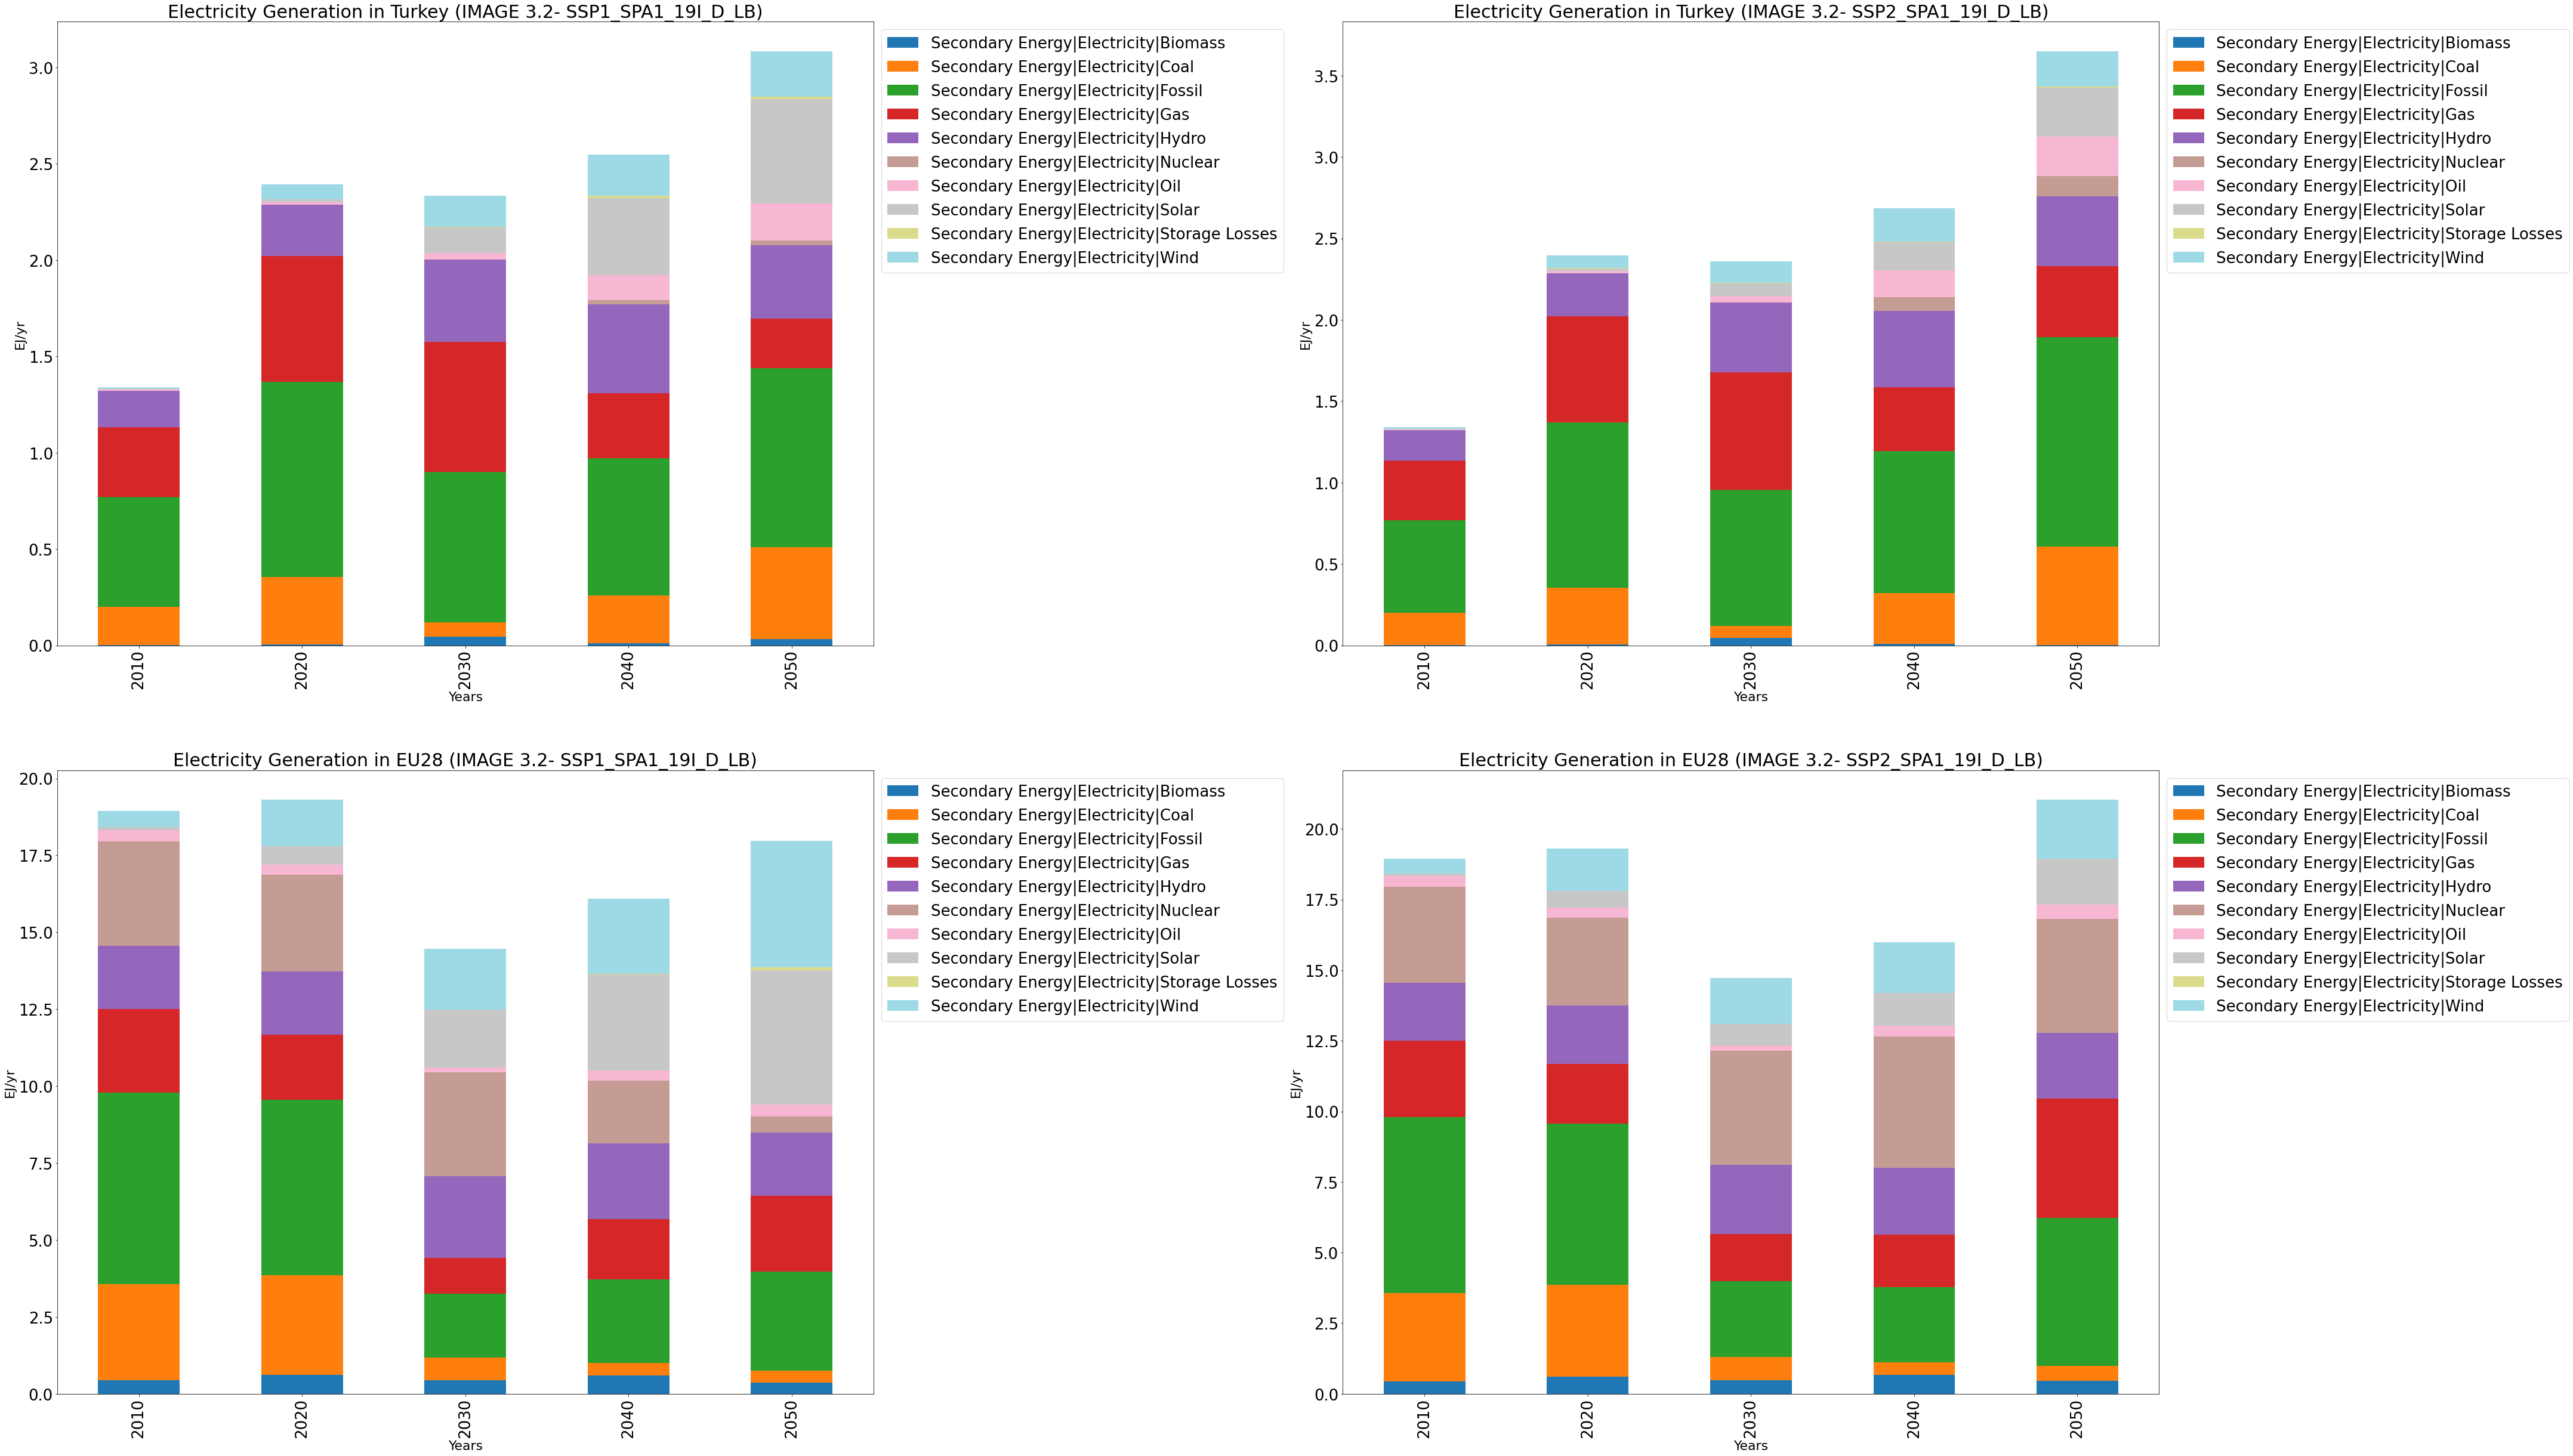

In [96]:
fig, axarr = plt.subplots(2, 2, figsize=(60, 34))

data1.plot.bar(
    bars="variable", stacked=True, cmap="tab20", fontsize=26,ax=axarr[0][0])
axarr[0][0].set_title("Electricity Generation in Turkey (IMAGE 3.2- SSP1_SPA1_19I_D_LB)", fontsize=30)
plt.tight_layout()
axarr[0][0].set_xlabel('Years', fontsize=22)
axarr[0][0].set_ylabel('EJ/yr', fontsize=22)
axarr[0][0].legend(bbox_to_anchor=(1, 1),prop={'size':26})

data2.plot.bar(
    bars="variable", stacked=True, cmap="tab20", fontsize=26, ax=axarr[0][1])
axarr[0][1].set_title("Electricity Generation in Turkey (IMAGE 3.2- SSP2_SPA1_19I_D_LB)", fontsize=30)
plt.tight_layout()
axarr[0][1].set_xlabel('Years', fontsize=22)
axarr[0][1].set_ylabel('EJ/yr', fontsize=22)
axarr[0][1].legend(bbox_to_anchor=(1, 1),prop={'size':26})

data3.plot.bar(
    bars="variable", stacked=True, cmap="tab20", fontsize=26,ax=axarr[1][0])
axarr[1][0].set_title("Electricity Generation in EU28 (IMAGE 3.2- SSP1_SPA1_19I_D_LB)", fontsize=30)
plt.tight_layout()
axarr[1][0].set_xlabel('Years', fontsize=22)
axarr[1][0].set_ylabel('EJ/yr', fontsize=22)
axarr[1][0].legend(bbox_to_anchor=(1, 1),prop={'size':26})
plt.tight_layout()


data4.plot.bar(
    bars="variable", stacked=True, cmap="tab20", fontsize=26,ax=axarr[1][1])
axarr[1][1].set_title("Electricity Generation in EU28 (IMAGE 3.2- SSP2_SPA1_19I_D_LB)", fontsize=30)
axarr[1][1].set_xlabel('Years', fontsize=22)
axarr[1][1].set_ylabel('EJ/yr', fontsize=22)
axarr[1][1].legend(bbox_to_anchor=(1, 1),prop={'size':26})
plt.tight_layout()

plt.subplots_adjust(hspace=.2)

As we can see the plots above, electricity generation in Turkey is increasing (more than doubled) until 2050 in both scenarios.

When I look at the used energy carriers, I realized that solar, hydro and wind usage are increasing over time. However, in both scenarios fossil fuel usage is also increasing in Turkey. This may be related with lack of studies about energy efficiency etc. Also, in both scenarios there is noticable increase in coal usage. This looks inevitable to me, when we consider the current coal and natural gas dependency in Turkey.

When we look at the EU28 data for same scenarios, in the first scenario electricity generation slightly decreased in 2050. In the second scenario there is relative increase in 2050. Here it is interesting for me to see the increase in gas consumption in the secon scenario. 